# IMPORT DE DONNEES

In [ ]:
#VISUALISATION ET IMPORT DE DONNEES
import os
import pickle
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns



#SKLEARN FUNCTIONS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import joblib


########################      PRE-PROCESSING      #############################


#ouverture et lecture des deux fichiers csv : frequences propres et entrées 
freq = pd.read_csv(open("testPOC.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dictPOC.csv", "r"),
                    delimiter=",")
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################




#######################      TRAIN_TEST_SPLIT      ############################
# 70% de la population sera allouée à l'apprentissage, 30 % pour le test
population_train = 0.7

# mélange et séparation de nos données en 2 datasets  
split_train, split_test = train_test_split(datas, train_size=population_train)

# On extrait les données qui serviront d'objectif à atteindre, soit ici les 
# 8 fréquences propres à prédire

entrees = ['L_tot','rho', 'h', 'b']
split_target_train = split_train.drop(columns=entrees)
split_target_test = split_test.drop(columns=entrees)


frequences = ["freq1"]
split_train = split_train.drop(columns=frequences)
split_test = split_test.drop(columns=frequences)

print("entrées train : \n",split_train)
print("target train : \n", split_target_train)

#split_train = entrees servant à entrainer le modèle
#split test = entrees servant à tester le modèle
#split_target_train = sorties d'entrainement du modèle
#split_target_test = sorties de test du modèle 


#######################      FIN TR_TST_SPLIT      ############################

# PROCESSING

In [ ]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
"""my_grid_poly ={'polynomialfeatures__degree': [9],
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}


poly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)
grid_search = GridSearchCV(poly_reg_model, my_grid_poly, cv=5, n_jobs=-1, verbose=2,)
#print best score and model
# Ravel plit_target_train
jesuisunfdp = grid_search.fit(split_train, split_target_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)"""

In [ ]:
poly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_model.fit(split_train, split_target_train)
print("",poly_reg_model.score(split_test, split_target_test))

In [ ]:
Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline


polynomial_features = PolynomialFeatures(degree=9)
linear_regression = LinearRegression(fit_intercept=True, normalize=True)
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(split_train, split_target_train)
print("",pipeline.score(split_test, split_target_test))

In [ ]:
poly_reg_model = PolynomialRegression(2 , fit_intercept=True, normalize=True)
poly_reg_model.fit(split_train, split_target_train)
print("",poly_reg_model.score(split_test, split_target_test))

# PASSAGE A L'EVALUATION DU MODELE EN FONCTION DU NOMBRE DE DONNEES

In [ ]:
freq = pd.read_csv(open("test10el.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dict10el.csv", "r"),
                    delimiter=",")
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################


In [ ]:
# keep 10000 random values of datas
import time


score = []
nbr_values = []
exec_time = []

for i in range(1500,3500,100):

    new_datas = datas.sample(i)
    #######################      TRAIN_TEST_SPLIT      ############################
    # 70% de la population sera allouée à l'apprentissage, 30 % pour le test
    population_train = 0.7

    # mélange et séparation de nos données en 2 datasets  
    split_train, split_test = train_test_split(new_datas, train_size=population_train)

    # On extrait les données qui serviront d'objectif à atteindre, soit ici les 
    # 8 fréquences propres à prédire

    entrees = ['L_tot','rho', 'h', 'b']
    split_target_train = split_train.drop(columns=entrees)
    split_target_test = split_test.drop(columns=entrees)


    frequences = ["freq1"]
    split_train = split_train.drop(columns=frequences)
    split_test = split_test.drop(columns=frequences)
    start = time.time()
    poly_reg_model = PolynomialRegression(9 , fit_intercept=True, normalize=True)
    poly_reg_model.fit(split_train, split_target_train)
    end = (time.time() - start)
    score.append(poly_reg_model.score(split_test, split_target_test))
    nbr_values.append(i)
    exec_time.append(time.time() - start)

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.plot(nbr_values, exec_time)
plt.legend(
    ['score', 'exec_time'])
plt.show()

print(score)
print(exec_time)
print(nbr_values)

Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

# show best ratio score / exec_time





    





## Entrainement 100 elements finnis


In [ ]:
freq = pd.read_csv(open("test100.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dict100.csv", "r"),
                    delimiter=",")

# delete last column of inputs
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################

In [ ]:
import time


score = []
nbr_values = []
exec_time = []

for i in range(2500,5000,100):

    new_datas = datas.sample(i)
    #######################      TRAIN_TEST_SPLIT      ############################
    # 70% de la population sera allouée à l'apprentissage, 30 % pour le test
    population_train = 0.7

    # mélange et séparation de nos données en 2 datasets  
    split_train, split_test = train_test_split(new_datas, train_size=population_train)

    # On extrait les données qui serviront d'objectif à atteindre, soit ici les 
    # 8 fréquences propres à prédire

    entrees = ['L_tot','rho', 'h', 'b']
    split_target_train = split_train.drop(columns=entrees)
    split_target_test = split_test.drop(columns=entrees)


    frequences = ["freq1"]
    split_train = split_train.drop(columns=frequences)
    split_test = split_test.drop(columns=frequences)
    start = time.time()
    poly_reg_model = PolynomialRegression(9 , fit_intercept=True, normalize=True)
    poly_reg_model.fit(split_train, split_target_train)
    end = (time.time() - start)
    score.append(poly_reg_model.score(split_test, split_target_test))
    nbr_values.append(i)
    exec_time.append(time.time() - start)

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.plot(nbr_values, exec_time)
plt.legend(
    ['score', 'exec_time'])
plt.show()

print(score)
print(exec_time)
print(nbr_values)

Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

for i in range(0, len(score)):
    score[i] = score[i] / exec_time[i]
  

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.legend(
    ['score / exec_time'])
plt.show()






# Entrainement des modèles pour les autres formes de poutres


## Load et gestion des données

In [ ]:
freq_cercle = pd.read_csv(open("gen_data/test_Cercle.csv", "r"),delimiter=",")
input_cercle = pd.read_csv(open("gen_data/dict_Cercle.csv", "r"),delimiter=",")

freq_cercle_creux = pd.read_csv(open("gen_data/test_Cercle_Creux.csv", "r"),delimiter=",")
input_cercle_creux = pd.read_csv(open("gen_data/dict_Cercle_Creux.csv", "r"),delimiter=",")

freq_rectangle_creux = pd.read_csv(open("gen_data/test_Rectangle_Creux.csv", "r"),delimiter=",")
input_rectangle_creux = pd.read_csv(open("gen_data/dict_Rectangle_Creux.csv", "r"),delimiter=",")

freq_rectangle = pd.read_csv(open("test10el.csv", "r"),delimiter=",")
input_rectangle = pd.read_csv(open("dict10el.csv", "r"),delimiter=",")

freq_rectangle100el = pd.read_csv(open("test100.csv", "r"),delimiter=",")
input_rectangle100el = pd.read_csv(open("dict100.csv", "r"),delimiter=",")

data_cercle = [input_cercle, freq_cercle]
data_cercle = pd.concat(data_cercle, axis=1)

data_cercle_creux = [input_cercle_creux, freq_cercle_creux]
data_cercle_creux = pd.concat(data_cercle_creux, axis=1)

data_rectangle_creux = [input_rectangle_creux, freq_rectangle_creux]
data_rectangle_creux = pd.concat(data_rectangle_creux, axis=1)

data_rectangle = [input_rectangle, freq_rectangle]
data_rectangle = pd.concat(data_rectangle, axis=1)



to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
to_drop_sans_mat = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
freq1 = frequences

data_cercle = data_cercle.drop(columns=to_drop)
data_cercle_creux = data_cercle_creux.drop(columns=to_drop)
data_rectangle_creux = data_rectangle_creux.drop(columns=to_drop)
data_rectangle = data_rectangle.drop(columns=to_drop_sans_mat)


split_train_cercle,split_test_cercle = train_test_split(data_cercle, train_size=population_train)
entrees_cercle = ['L_tot','rho', 'r']
split_target_train_cercle = split_train_cercle.drop(columns=entrees_cercle)
split_target_test_cercle = split_test_cercle.drop(columns=entrees_cercle)
split_train_cercle.head(10)
print(split_train_cercle)



split_train_cercle_creux,split_test_cercle_creux = train_test_split(data_cercle_creux, train_size=population_train)
entrees_cercle_creux = ['L_tot','rho', 'r_ext','r_int']
split_target_train_cercle_creux = split_train_cercle_creux.drop(columns=entrees_cercle_creux)
split_target_test_cercle_creux = split_test_cercle_creux.drop(columns=entrees_cercle_creux)
split_train_cercle_creux = split_train_cercle_creux.drop(columns=freq1)
split_test_cercle_creux = split_test_cercle_creux.drop(columns=freq1)


entrees_rectangle_creux = ['L_tot','rho', 'h_ext','b_ext','h_int','b_int']
split_train_rectangle_creux,split_test_rectangle_creux = train_test_split(data_rectangle_creux, train_size=population_train)
split_target_train_rectangle_creux = split_train_rectangle_creux.drop(columns=entrees_rectangle_creux)
split_target_test_rectangle_creux = split_test_rectangle_creux.drop(columns=entrees_rectangle_creux)
split_train_rectangle_creux = split_train_rectangle_creux.drop(columns=freq1)
split_test_rectangle_creux = split_test_rectangle_creux.drop(columns=freq1)


entrees_rectangle = ['L_tot','rho', 'h','b']
split_train_rectangle,split_test_rectangle = train_test_split(data_rectangle, train_size=population_train)
split_target_train_rectangle = split_train_rectangle.drop(columns=entrees_rectangle)
split_target_test_rectangle = split_test_rectangle.drop(columns=entrees_rectangle)
split_train_rectangle = split_train_rectangle.drop(columns=freq1)
split_test_rectangle = split_test_rectangle.drop(columns=freq1)


## Entrainement des modèles

In [ ]:
poly_reg_cercle = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_cercle.fit(split_train_cercle, split_target_train_cercle)
poly_reg_cercle_creux = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_cercle_creux.fit(split_train_cercle_creux, split_target_train_cercle_creux)
poly_reg_rectangle_creux = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_rectangle_creux.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
poly_reg_rectangle = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_rectangle.fit(split_train_rectangle, split_target_train_rectangle)

Y_pred_cercle = poly_reg_cercle.predict(split_test_cercle)
Y_pred_cercle_creux = poly_reg_cercle_creux.predict(split_test_cercle_creux)
Y_pred_rectangle_creux = poly_reg_rectangle_creux.predict(split_test_rectangle_creux)
Y_pred_rectangle = poly_reg_rectangle.predict(split_test_rectangle)

# print score for each modèle
print("Cercle : ",poly_reg_cercle.score(split_test_cercle, split_target_test_cercle))
print("Cercle creux",poly_reg_cercle_creux.score(split_test_cercle_creux, split_target_test_cercle_creux))
print("Rectangle creuc",poly_reg_rectangle_creux.score(split_test_rectangle_creux, split_target_test_rectangle_creux))
print("Rectangle",poly_reg_rectangle.score(split_test_rectangle, split_target_test_rectangle))



In [ ]:
split_train_rectangle.head(10)

In [ ]:
# grid search for cercle_creux

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

"""my_grid_poly ={'polynomialfeatures__degree': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                'linearregression__fit_intercept': [True],
                'linearregression__normalize': [True]}
grid = GridSearchCV(PolynomialRegression(), my_grid_poly, cv=2,verbose=1)
grid.fit(split_train_cercle_creux, split_target_train_cercle_creux)
print(grid.best_params_)
print(grid.best_score_)"""
# best param degré = 6 true true for 0.97 best score 

my_grid_rf ={'n_estimators': [80],
                'max_depth': [19,],
                'min_samples_split': [2,3,4,5,6,7,8,9,10],
              }
                
grid = GridSearchCV(RandomForestRegressor(), my_grid_rf, cv=2,verbose=1)
grid.fit(split_train_cercle_creux, split_target_train_cercle_creux)
print(grid.best_params_)
print(grid.best_score_)

In [11]:
"""# plot prediction
plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle)[:80])
plt.plot((np.array(split_target_test_cercle)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle_creux)[:80])
plt.plot((np.array(split_target_test_cercle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot((Y_pred_rectangle_creux)[:80])
plt.plot((np.array(split_target_test_rectangle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()"""

from other_freqs import gen_model_Rectangle_creux, gen_model_Cercle_creux, gen_model_cercle, gen_model_rect

reg_lin_rect = gen_model_rect()
reg_lin_cercle = gen_model_cercle()
reg_lin_rect_creux = gen_model_Rectangle_creux()
reg_lin_cercle_creux = gen_model_Cercle_creux()

ImportError: cannot import name 'gen_model_Rectangle_creux' from 'other_freqs' (C:\Dev\5A\apprentissage_automatique\projetIA\other_freqs.py)

In [ ]:
# save all 4 models with pickle
with open('model_cercle.pkl', 'wb') as f:
    pickle.dump(poly_reg_cercle, f)
with open('model_cercle_creux.pkl', 'wb') as f:
    pickle.dump(poly_reg_cercle_creux, f)
with open('model_rectangle_creux.pkl', 'wb') as f:
    pickle.dump(poly_reg_rectangle_creux, f)
with open('model_rectangle.pkl', 'wb') as f:
    pickle.dump(poly_reg_rectangle, f)

# Entrainement des modèles pour les autres formes de poutres


## Load et gestion des données

In [74]:
freq_cercle = pd.read_csv(open("gen_data/test_Cercle.csv", "r"),delimiter=",")
input_cercle = pd.read_csv(open("gen_data/dict_Cercle.csv", "r"),delimiter=",")

freq_cercle_creux = pd.read_csv(open("gen_data/test_Cercle_Creux.csv", "r"),delimiter=",")
input_cercle_creux = pd.read_csv(open("gen_data/dict_Cercle_Creux.csv", "r"),delimiter=",")

freq_rectangle_creux = pd.read_csv(open("gen_data/test_Rectangle_Creux.csv", "r"),delimiter=",")
input_rectangle_creux = pd.read_csv(open("gen_data/dict_Rectangle_Creux.csv", "r"),delimiter=",")

freq_rectangle = pd.read_csv(open("test10el.csv", "r"),delimiter=",")
input_rectangle = pd.read_csv(open("dict10el.csv", "r"),delimiter=",")

freq_rectangle100el = pd.read_csv(open("test100.csv", "r"),delimiter=",")
input_rectangle100el = pd.read_csv(open("dict100.csv", "r"),delimiter=",")

data_cercle = [input_cercle, freq_cercle]
data_cercle = pd.concat(data_cercle, axis=1)

data_cercle_creux = [input_cercle_creux, freq_cercle_creux]
data_cercle_creux = pd.concat(data_cercle_creux, axis=1)

data_rectangle_creux = [input_rectangle_creux, freq_rectangle_creux]
data_rectangle_creux = pd.concat(data_rectangle_creux, axis=1)

data_rectangle = [input_rectangle, freq_rectangle]
data_rectangle = pd.concat(data_rectangle, axis=1)



to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
to_drop_sans_mat = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
freq1 = frequences

data_cercle = data_cercle.drop(columns=to_drop)
data_cercle_creux = data_cercle_creux.drop(columns=to_drop)
data_rectangle_creux = data_rectangle_creux.drop(columns=to_drop)
data_rectangle = data_rectangle.drop(columns=to_drop_sans_mat)


split_train_cercle,split_test_cercle = train_test_split(data_cercle, train_size=population_train)
entrees_cercle = ['L_tot','rho', 'r']
split_target_train_cercle = split_train_cercle.drop(columns=entrees_cercle)
split_target_test_cercle = split_test_cercle.drop(columns=entrees_cercle)
split_train_cercle.head(10)
split_train_cercle = split_train_cercle.drop(columns=freq1)
split_test_cercle = split_test_cercle.drop(columns=freq1)
print(split_train_cercle)



split_train_cercle_creux,split_test_cercle_creux = train_test_split(data_cercle_creux, train_size=population_train)
entrees_cercle_creux = ['L_tot','rho', 'r_ext','r_int']
split_target_train_cercle_creux = split_train_cercle_creux.drop(columns=entrees_cercle_creux)
split_target_test_cercle_creux = split_test_cercle_creux.drop(columns=entrees_cercle_creux)
split_train_cercle_creux = split_train_cercle_creux.drop(columns=freq1)
split_test_cercle_creux = split_test_cercle_creux.drop(columns=freq1)


entrees_rectangle_creux = ['L_tot','rho', 'h_ext','b_ext','h_int','b_int']
split_train_rectangle_creux,split_test_rectangle_creux = train_test_split(data_rectangle_creux, train_size=population_train)
split_target_train_rectangle_creux = split_train_rectangle_creux.drop(columns=entrees_rectangle_creux)
split_target_test_rectangle_creux = split_test_rectangle_creux.drop(columns=entrees_rectangle_creux)
split_train_rectangle_creux = split_train_rectangle_creux.drop(columns=freq1)
split_test_rectangle_creux = split_test_rectangle_creux.drop(columns=freq1)


entrees_rectangle = ['L_tot','rho', 'h','b']
split_train_rectangle,split_test_rectangle = train_test_split(data_rectangle, train_size=population_train)
split_target_train_rectangle = split_train_rectangle.drop(columns=entrees_rectangle)
split_target_test_rectangle = split_test_rectangle.drop(columns=entrees_rectangle)
split_train_rectangle = split_train_rectangle.drop(columns=freq1)
split_test_rectangle = split_test_rectangle.drop(columns=freq1)


         L_tot   rho         r
1754  0.889117  2700  0.062023
2179  0.881907  2700  0.072903
2061  0.914011  8900  0.018579
2465  0.871534  2400  0.054614
2103  0.749793  4510  0.058133
...        ...   ...       ...
754   0.879830  2500  0.030287
752   0.496858  7850  0.016758
1213  0.225606  7800  0.015042
1148  0.903471  2500  0.022052
976   0.752500  2400  0.047345

[1750 rows x 3 columns]


## Entrainement des modèles

In [106]:
poly_reg_cercle = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_cercle.fit(split_train_cercle, split_target_train_cercle)
poly_reg_cercle_creux = PolynomialRegression(6, fit_intercept=True, normalize=True)
poly_reg_cercle_creux.fit(split_train_cercle_creux, split_target_train_cercle_creux)
poly_reg_rectangle_creux = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_rectangle_creux.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
poly_reg_rectangle = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_rectangle.fit(split_train_rectangle, split_target_train_rectangle)

Y_pred_cercle = poly_reg_cercle.predict(split_test_cercle)
Y_pred_cercle_creux = poly_reg_cercle_creux.predict(split_test_cercle_creux)
Y_pred_rectangle_creux = poly_reg_rectangle_creux.predict(split_test_rectangle_creux)
Y_pred_rectangle = poly_reg_rectangle.predict(split_test_rectangle)

# print score for each modèle
print("Cercle : ",poly_reg_cercle.score(split_test_cercle, split_target_test_cercle))
print("Cercle creux",poly_reg_cercle_creux.score(split_test_cercle_creux, split_target_test_cercle_creux))
print("Rectangle creuc",poly_reg_rectangle_creux.score(split_test_rectangle_creux, split_target_test_rectangle_creux))
print("Rectangle",poly_reg_rectangle.score(split_test_rectangle, split_target_test_rectangle))



c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

Cercle :  0.9988970369335772
Cercle creux 0.9426892741043471
Rectangle creuc -400951.3377569574
Rectangle 0.9991232913831497


In [76]:
split_train_rectangle.head(10)

,L_tot,rho,h,b
32140,0.713653,7850,0.010122,0.053089
26547,0.608419,2700,0.014196,0.034457
93714,0.532343,2400,0.028021,0.006812
79338,0.292537,2700,0.016544,0.007129
56031,0.954689,2400,0.072845,0.077665
13437,0.229996,2700,0.003504,0.010639
90606,0.104518,2700,0.001158,0.009625
71461,0.725256,4510,0.020567,0.016321
94804,0.159710,2700,0.006991,0.010782
65028,0.927473,2400,0.035627,0.089328


In [103]:
# grid search for cercle_creux

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

"""my_grid_poly ={'polynomialfeatures__degree': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                'linearregression__fit_intercept': [True,False],
                'linearregression__normalize': [True,False]}
grid = GridSearchCV(PolynomialRegression(), my_grid_poly, cv=3,verbose=2)
grid.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
print(grid.best_params_)
print(grid.best_score_)"""

#best for rectangle creux : {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 4}
# score : 0.91 
# best param degré = 6 true true for 0.97 best score 

my_grid_rf ={'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,200,300,400,500],
                'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                'min_samples_split':[2],
                'min_samples_leaf':[1],
                'max_features':['auto'],
                'bootstrap':[True]}

#{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
#0.9472339926463627
# cercle creux 
                
grid = GridSearchCV(RandomForestRegressor(), my_grid_rf, cv=3,verbose=1,n_jobs=-1)
grid.fit(split_test_rectangle_creux, split_target_test_rectangle_creux)
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 285 candidates, totalling 855 fits


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'bootstrap': True, 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}
0.9122820608193143


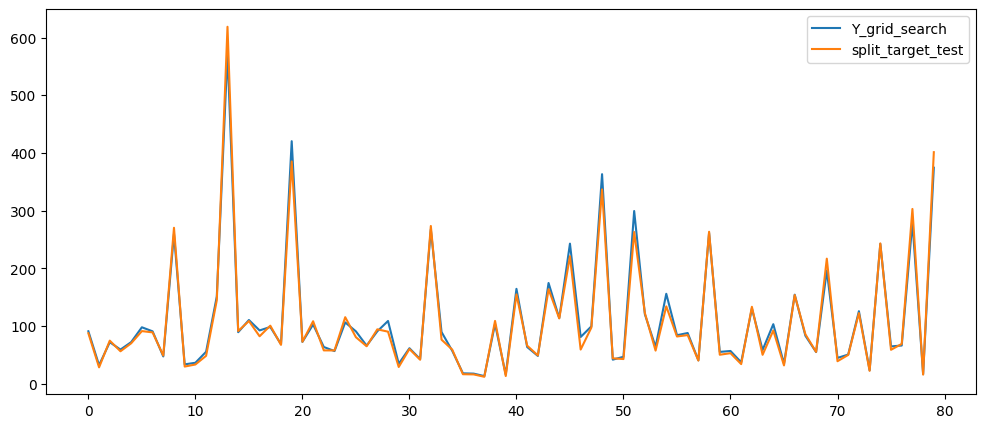

In [104]:
"""# plot prediction
plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle)[:80])
plt.plot((np.array(split_target_test_cercle)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle_creux)[:80])
plt.plot((np.array(split_target_test_cercle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot((Y_pred_rectangle_creux)[:80])
plt.plot((np.array(split_target_test_rectangle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()"""

# plot prediction for rectangle creux
Y_pred_rectangle_creux = grid.predict(split_test_rectangle_creux)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred_rectangle_creux)[:80])
plt.plot((np.array(split_target_test_rectangle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

In [90]:
# save all 4 models with pickle
with open('model_cercle.pkl', 'wb') as f:
    pickle.dump(poly_reg_cercle, f)
with open('model_cercle_creux.pkl', 'wb') as f:
    pickle.dump(poly_reg_cercle_creux, f)
with open('model_rectangle_creux.pkl', 'wb') as f:
    pickle.dump(poly_reg_rectangle_creux, f)
with open('model_rectangle.pkl', 'wb') as f:
    pickle.dump(poly_reg_rectangle, f)

